In [1]:
%matplotlib inline
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
map = hp.read_map('../dataverse_files/545/2.5e+20_gp20/cib_fullmission.hpx.fits',
    verbose=False)
mask_bool = hp.read_map('../dataverse_files/545/2.5e+20_gp20/mask_bool.hpx.fits', verbose=False, dtype=bool)
mask_apod = hp.read_map('../dataverse_files/545/2.5e+20_gp20/mask_apod.hpx.fits', verbose=False, dtype=float)

/Applications/miniconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


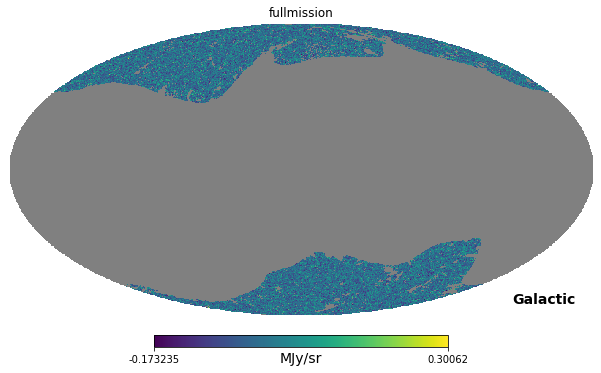

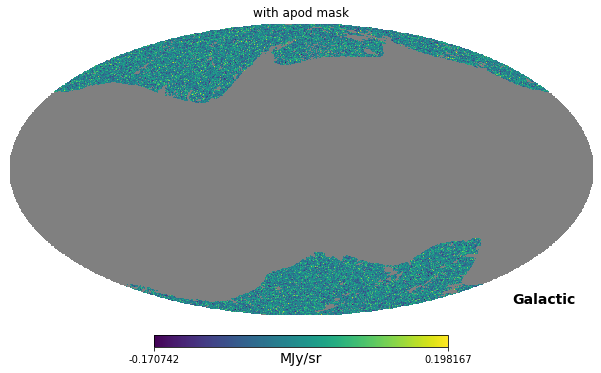

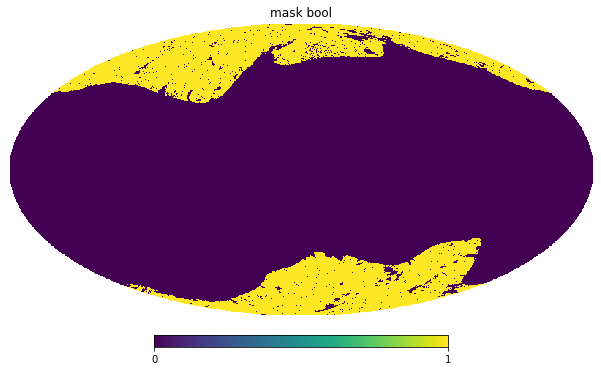

In [9]:
hp.mollview(map,  unit='MJy/sr',title='fullmission', coord=['G'])
map2 = map * mask_apod
hp.mollview(map2,  unit='MJy/sr', title='with apod mask', coord=['G'])
hp.mollview(mask_bool, title='mask bool')
#print (hp.pixelfunc.npix2nside(len(map)))

2048
[ 0.00025264 -0.00066068  0.00034341 ... -0.00034249  0.0003593
 -0.00022963]
128


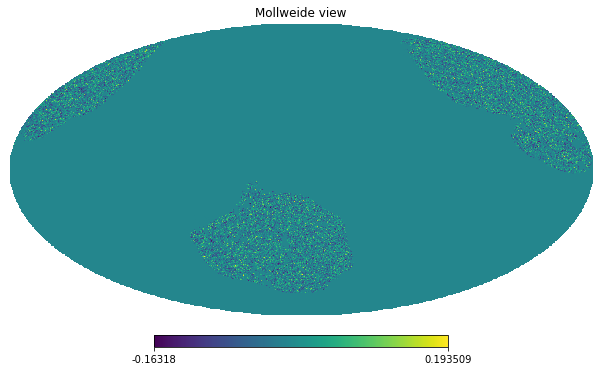

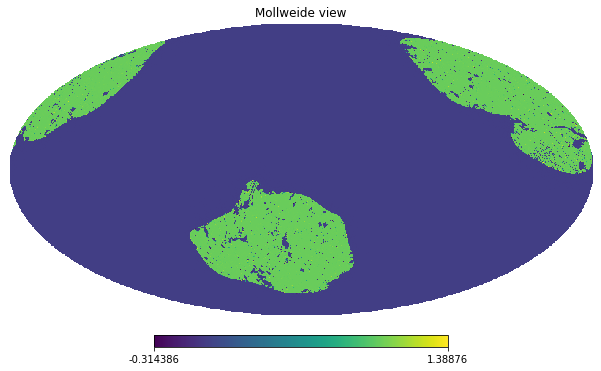

In [7]:
map_equatorial = hp.read_map('../map_equatorial.fits', verbose=False)
mask_equatorial = hp.read_map('../mask_equatorial.fits', verbose=False)
map_equatorial[mask_equatorial == False] = hp.UNSEEN

print (hp.pixelfunc.npix2nside(len(map_equatorial)))
hp.mollview(map_equatorial)

hp.mollview(mask_equatorial)
print (mask_equatorial)
map_equatorial_128 = hp.read_map('../map_equatorial_128.fits', verbose=False)
print (hp.pixelfunc.npix2nside(len(map_equatorial_128)))

(0, 500)

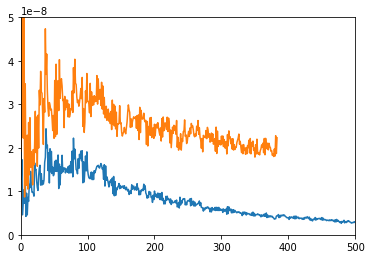

In [4]:
plt.plot(np.arange(3*2048), hp.anafast(map_equatorial))
plt.plot(np.arange(3*128), hp.anafast(map_equatorial_128))
plt.ylim(0, 0.5e-7)
plt.xlim(0, 500)

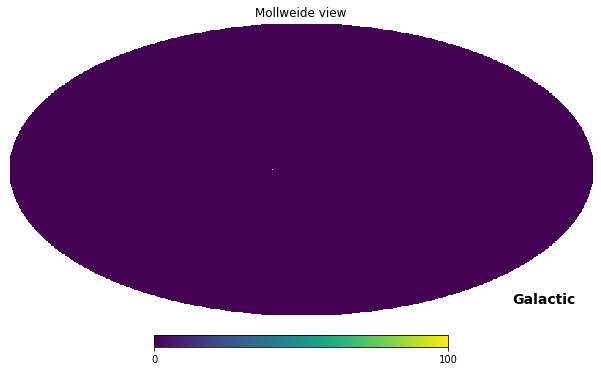

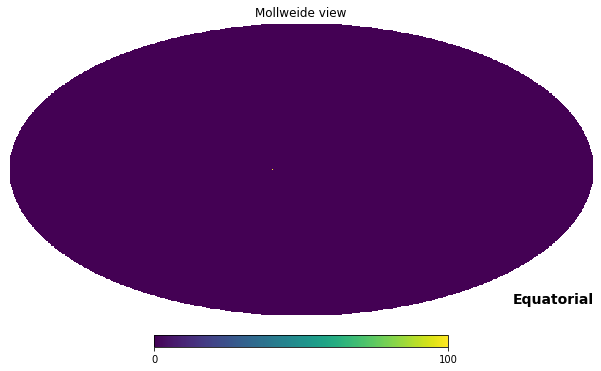

In [42]:
a = hp.pixelfunc.ang2pix(nside=128, theta=np.pi/2, phi=np.pi/10)
check = np.zeros(hp.pixelfunc.nside2npix(128)) 
check[a]=100
hp.mollview(check, coord=['G'])

hp.mollview(check, coord=['C'])




8641.377213430736
10406.585182377528


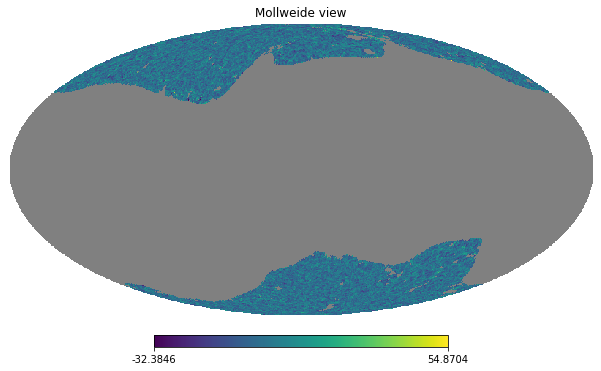

In [30]:
map2[mask_bool == False] = hp.UNSEEN
map2 = hp.ma(map2)
print (np.sum(map2))

#map_128[mask_bool_128 == False] = hp.UNSEEN

 
map_128[np.where(np.isnan(map_128))] = hp.UNSEEN

map_128 = hp.ma(map_128)
print (np.sum(map_128))
hp.mollview(map_128)

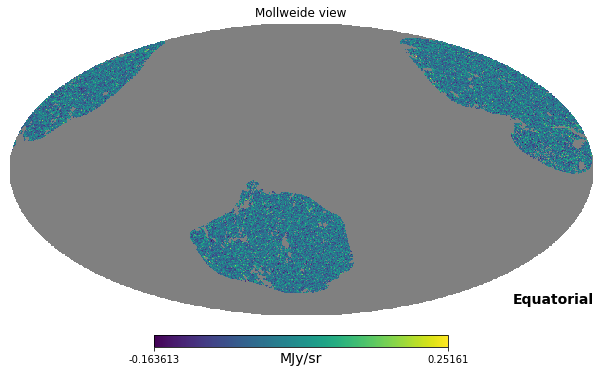

In [5]:
# converting map from Galactic coordinates to equatorial coordinates
hp.mollview(map2,  unit='MJy/sr',  coord=['G','C'])


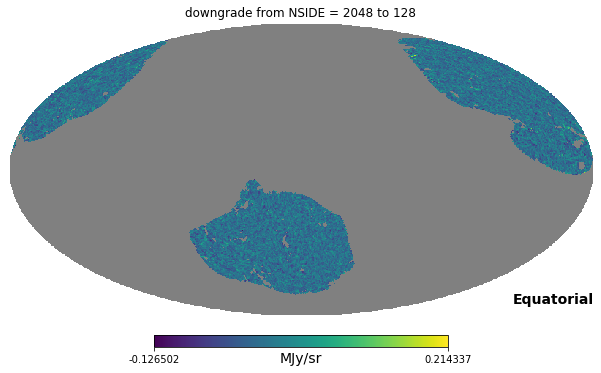

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


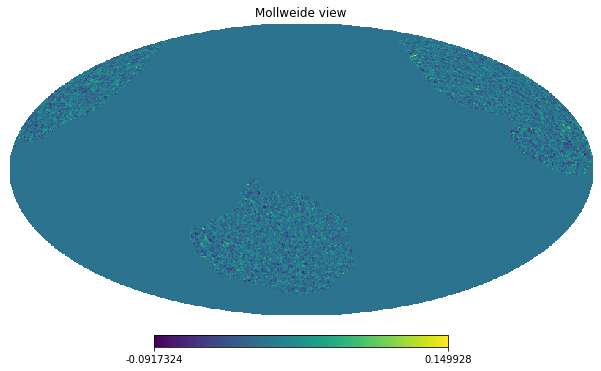

In [14]:
r = hp.rotator.Rotator(coord=['G','C'])
map3 = r.rotate_map_alms(map_128)
hp.mollview(map3)

In [ ]:
lmax = 1024
ell = np.arange(lmax)
cl2 = hp.anafast(map2, lmax =lmax-1)
cl = hp.anafast(np.where(mask_bool, map, 0.) * mask_apod,  lmax=lmax-1)

In [90]:
print ( cl2[:lmax] , cl, cl2[:lmax] - cl )

[3.70418170e-07 3.90305300e-08 1.72089505e-07 ... 1.06101595e-09
 9.98240951e-10 1.00938093e-09] [3.70418170e-07 3.90305300e-08 1.72089505e-07 ... 1.06101595e-09
 9.98240951e-10 1.00938093e-09] [0. 0. 0. ... 0. 0. 0.]


(1, 1024)

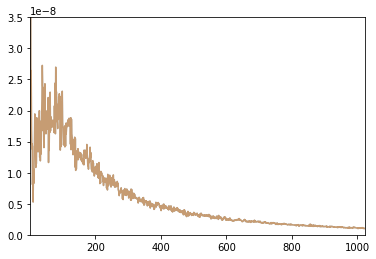

In [93]:
plt.plot(ell, cl, alpha=0.5, label='cl')

plt.plot(ell, cl2, alpha=0.5, label='cl2')

plt.ylim(0,3.5e-8)
plt.xlim(1, lmax)

In [94]:
fsky = mask_bool.sum()/mask_bool.size

In [95]:
import pandas as pd

windowfuncs = pd.read_csv('../dataverse_files/545/2.5e+20_gp20/windowfunctions.csv', comment='#')

(0, 2e-07)

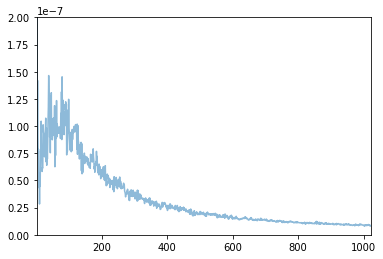

In [106]:
cl_modified = cl / fsky / windowfuncs['Wl_eff'][:lmax]**2
plt.plot(ell, cl_modified, alpha=0.5, label='This')
plt.xlim(1, lmax)
plt.ylim(0,2e-7)



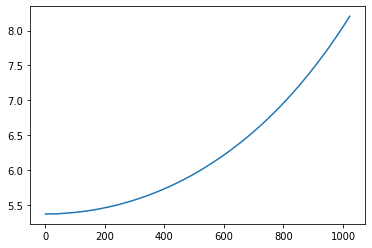

In [97]:
plt.plot(ell, 1/ fsky / windowfuncs['Wl_eff'][:lmax]**2)

In [ ]:
alm = hp.sphtfunc.map2alm(mask_bool)